In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [72]:
mean_01 = np.array([1, 1])
cov_01 = np.array([[2.9, -4.9], [-4.9, 3.1]])

# print mean_01
# print cov_01

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
print dist_01.shape
print np.cov(dist_01.T)

(500, 2)
[[ 4.56510274 -2.86859156]
 [-2.86859156  4.8911147 ]]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: covariance is not positive-semidefinite.


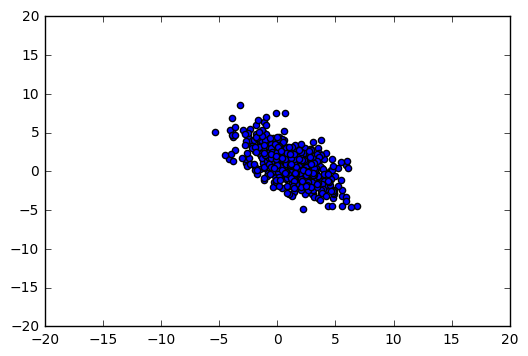

In [73]:
plt.figure(0)
plt.xlim(-20, 20)
plt.ylim(-20, 20)

plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.show()

In [28]:
x = np.array([[1, 2, 3], [3, 5, -1]])
print x.shape
print x

(2, 3)
[[ 1  2  3]
 [ 3  5 -1]]


In [30]:
print x[:, 1:]

[[ 2  3]
 [ 5 -1]]
